# Laboratory Exercise - 2

# Obtain

In [240]:
import os
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot as plt
from fbprophet import Prophet
import plotly as py
import plotly.graph_objs as go


In [279]:
housing = pd.read_csv('Zip_Zhvi_SingleFamilyResidence.csv', encoding = 'latin-1').fillna(0)
housing.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.0,335400.0,336500.0,...,1038600,1041400,1042100,1041900,1043600,1047000,1048600,1046800,1046500,1051600
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,332600,334500,335900,337100,338400,338400,336900,336000,335900,335100
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.0,500900.0,503100.0,...,1321000,1324800,1322600,1319900,1319400,1318400,1317200,1318000,1320700,1327000
3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.0,77300.0,77300.0,...,121300,122200,123000,123600,124500,125700,126300,126800,127500,128200
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.0,95600.0,95800.0,...,176400,176800,176900,177400,178000,178600,179400,180200,180900,181700


In [160]:
housing.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
count,15533.000000,15533.000000,15533.000000,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,...,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04
mean,80780.222301,47669.525655,7767.000000,1.069980e+05,1.071068e+05,1.072139e+05,1.073181e+05,1.074323e+05,1.075644e+05,1.077379e+05,...,2.802374e+05,2.817488e+05,2.831092e+05,2.841684e+05,2.852049e+05,2.864123e+05,2.877066e+05,2.888305e+05,2.897778e+05,2.905968e+05
std,31496.834807,28985.566840,4484.135201,8.738713e+04,8.753150e+04,8.767616e+04,8.782470e+04,8.799578e+04,8.820222e+04,8.846428e+04,...,3.611161e+05,3.626860e+05,3.650263e+05,3.662374e+05,3.670201e+05,3.666675e+05,3.644700e+05,3.612256e+05,3.582214e+05,3.565128e+05
min,58196.000000,1001.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.170000e+04,2.220000e+04,2.220000e+04,2.200000e+04,2.180000e+04,2.170000e+04,2.150000e+04,2.160000e+04,2.190000e+04,2.200000e+04
25%,67247.000000,22306.000000,3884.000000,5.940000e+04,5.960000e+04,5.960000e+04,5.980000e+04,5.990000e+04,6.010000e+04,6.030000e+04,...,1.286000e+05,1.294000e+05,1.300000e+05,1.308000e+05,1.315000e+05,1.326000e+05,1.336000e+05,1.347000e+05,1.354000e+05,1.360000e+05
50%,77880.000000,45742.000000,7767.000000,9.120000e+04,9.130000e+04,9.130000e+04,9.130000e+04,9.140000e+04,9.150000e+04,9.160000e+04,...,1.919000e+05,1.931000e+05,1.942000e+05,1.953000e+05,1.965000e+05,1.977000e+05,1.991000e+05,2.007000e+05,2.017000e+05,2.026000e+05
75%,90300.000000,73801.000000,11650.000000,1.359000e+05,1.360000e+05,1.360000e+05,1.362000e+05,1.362000e+05,1.364000e+05,1.365000e+05,...,3.121000e+05,3.141000e+05,3.157000e+05,3.172000e+05,3.183000e+05,3.196000e+05,3.211000e+05,3.222000e+05,3.239000e+05,3.254000e+05
max,753844.000000,99901.000000,15533.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.742190e+07,1.744350e+07,1.771360e+07,1.800410e+07,1.826430e+07,1.831570e+07,1.810720e+07,1.761040e+07,1.694450e+07,1.651000e+07


In [161]:
housing[housing['State'] == 'AL'].Metro.value_counts()

Birmingham-Hoover         70
Huntsville                22
Mobile                    21
Tuscaloosa                17
Montgomery                14
Daphne-Fairhope-Foley     12
Fort Payne                10
Auburn-Opelika             8
Florence-Muscle Shoals     8
Dothan                     6
Gadsden                    6
Talladega-Sylacauga        6
0                          6
Alexander City             4
Columbus                   4
Enterprise                 3
Troy                       3
Decatur                    2
Albertville                1
Name: Metro, dtype: int64

In [162]:
housing.dtypes[1:20]

RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
dtype: object

In [163]:
#read in unemployment data
unemployment = pd.read_excel('ssamatab1.xlsx', skiprows= [0,1,3])
unemployment.tail()

,LAUS Code,State FIPS Code,Area FIPS Code,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
137458,MT7241900000000,72.0,41900.0,"San German, PR MSA",2018.0,12.0,34092.0,30104.0,3988.0,11.7
137459,MT7241980000000,72.0,41980.0,"San Juan-Carolina-Caguas, PR MSA",2018.0,12.0,726443.0,675285.0,51158.0,7.0
137460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137461,"SOURCE: BLS, LAUS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137462,"January 30, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
#get data types
unemployment.dtypes

LAUS Code                object
State FIPS Code         float64
Area FIPS Code          float64
Area                     object
Year                    float64
Month                   float64
Civilian Labor Force    float64
Employment              float64
Unemployment            float64
Unemployment Rate       float64
dtype: object

In [165]:
#explore quickly
unemployment.describe()

,State FIPS Code,Area FIPS Code,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
count,137460.000000,137460.000000,137460.000000,137460.000000,1.374600e+05,1.374600e+05,137460.000000,137460.000000
mean,29.293671,32077.670886,2004.000000,6.500000,3.183671e+05,2.996205e+05,18746.521432,6.147703
std,17.279152,15016.414599,8.366631,3.452065,7.517583e+05,7.060897e+05,48736.251332,3.069763
min,1.000000,10180.000000,1990.000000,1.000000,1.215300e+04,1.104100e+04,387.000000,1.000000
25%,13.000000,20260.000000,1997.000000,3.750000,6.226150e+04,5.834000e+04,3386.750000,4.200000
50%,29.000000,30140.000000,2004.000000,6.500000,1.032655e+05,9.675250e+04,6091.000000,5.400000
75%,44.000000,41500.000000,2011.000000,9.250000,2.410190e+05,2.266918e+05,14592.000000,7.200000
max,72.000000,79600.000000,2018.000000,12.000000,1.014256e+07,9.749830e+06,905101.000000,33.200000


## Scrub 

### Cleaning the Housing dataframe

In [280]:
#Change column names where needed
housing['ZipCode'] = housing['RegionName']
housing.drop(columns = ['RegionID','RegionName', '1996-04', '1996-05', '1996-06', '1996-07', 
                        '1996-08', '1996-09', '1996-10', '1996-11', '1996-12'], inplace = True)
housing.columns

Index(['City', 'State', 'Metro', 'CountyName', 'SizeRank', '1997-01',
       '1997-02', '1997-03', '1997-04', '1997-05',
       ...
       '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
       '2018-11', '2018-12', '2019-01', 'ZipCode'],
      dtype='object', length=271)

In [281]:
#set timeseries data
ts_start = housing.columns.get_loc('1997-01') #ignore data before 1996 to simplify
ts_end = housing.columns.get_loc('2018-12') + 1 #don't include 2019 data
date_columns = housing.iloc[:, ts_start:ts_end].columns.tolist()
print(ts_start, ts_end)
print(date_columns[0:4], date_columns[-5:])

5 269
['1997-01', '1997-02', '1997-03', '1997-04'] ['2018-08', '2018-09', '2018-10', '2018-11', '2018-12']


In [282]:
#change data types where needed
housing[date_columns] = housing[date_columns].astype(int)
housing['ZipCode'] = housing['ZipCode'].astype('category')
housing.dtypes

City            object
State           object
Metro           object
CountyName      object
SizeRank         int64
1997-01          int32
1997-02          int32
1997-03          int32
1997-04          int32
1997-05          int32
1997-06          int32
1997-07          int32
1997-08          int32
1997-09          int32
1997-10          int32
1997-11          int32
1997-12          int32
1998-01          int32
1998-02          int32
1998-03          int32
1998-04          int32
1998-05          int32
1998-06          int32
1998-07          int32
1998-08          int32
1998-09          int32
1998-10          int32
1998-11          int32
1998-12          int32
1999-01          int32
                ...   
2016-09          int32
2016-10          int32
2016-11          int32
2016-12          int32
2017-01          int32
2017-02          int32
2017-03          int32
2017-04          int32
2017-05          int32
2017-06          int32
2017-07          int32
2017-08          int32
2017-09    

In [169]:
#convert housing to a long format
housing2 = pd.melt(housing, id_vars = ['City', 'State', 'Metro', 'CountyName', 'ZipCode'], 
                   value_vars = date_columns)
print(housing2.shape)
housing2.head()

(4100712, 7)


,City,State,Metro,CountyName,ZipCode,variable,value
0,Chicago,IL,Chicago-Naperville-Elgin,Cook County,60657,1997-01,344400
1,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,77494,1997-01,197300
2,Chicago,IL,Chicago-Naperville-Elgin,Cook County,60614,1997-01,503400
3,El Paso,TX,El Paso,El Paso County,79936,1997-01,77800
4,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,77449,1997-01,96600


In [170]:
#need to change some column names
housing2.columns = ['City', 'State', 'Metro', 'CountyName', 'ZipCode', 'Date', 'MedianHousingValue']
#Convert the Date column to datetime
housing2['Date'] = pd.to_datetime(housing2['Date'], format='%Y-%m', errors='coerce').dropna()

### Cleaning the Unemployment dataframe

In [171]:
#drop uneeded columns
unemployment = unemployment.drop(columns= ['LAUS Code', 'State FIPS Code', 'Area FIPS Code'])
unemployment.columns

Index(['Area', 'Year', 'Month', 'Civilian Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate'],
      dtype='object')

In [172]:
#fill in missing values with 0
unemployment = unemployment.fillna(0)
np.sum(unemployment.isna())

Area                    0
Year                    0
Month                   0
Civilian Labor Force    0
Employment              0
Unemployment            0
Unemployment Rate       0
dtype: int64

In [177]:
#change data types where needed
unemployment['Year'] = unemployment['Year'].astype(int)
unemployment['Month'] = unemployment['Month'].astype(int)
unemployment['Civilian Labor Force'] = unemployment['Civilian Labor Force'].astype(int)
unemployment['Employment'] = unemployment['Employment'].astype(int)
unemployment['Unemployment'] = unemployment['Unemployment'].astype(int)

In [178]:
#need to combine Year and Month columns, but need to format Month column first with leading 0's
unemployment['Month'] = unemployment['Month'].apply(lambda x: str(x).zfill(2))
#combine the Year and Month columns into one
unemployment['Date'] = unemployment['Year'].map(str) + '-' + unemployment['Month'].map(str)
#Can now drop the Year and Month columns
unemployment = unemployment.drop(columns = ['Year', 'Month'])

In [179]:
#split out the state column from Area
temp = unemployment['Area'].str.split(",", n = 1, expand = True) 
unemployment = pd.concat([unemployment, temp], axis = 1)
#Can drop the area column now
unemployment = unemployment.drop(columns = ['Area'])
unemployment.columns = ['Civilian Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate', 
                        'Date', 'Metro', 'State']

In [180]:
#Convert the Date column to datetime
unemployment['Date'] = pd.to_datetime(unemployment['Date'], format='%Y-%m', errors='coerce').dropna()
unemployment.head()

,Civilian Labor Force,Employment,Unemployment,Unemployment Rate,Date,Metro,State
0,51485,48307,3178,6.2,1990-01-01,Anniston-Oxford-Jacksonville,AL MSA
1,44415,41247,3168,7.1,1990-01-01,Auburn-Opelika,AL MSA
2,457612,433590,24022,5.2,1990-01-01,Birmingham-Hoover,AL MSA
3,45859,43402,2457,5.4,1990-01-01,Daphne-Fairhope-Foley,AL MSA
4,65452,61009,4443,6.8,1990-01-01,Decatur,AL MSA


In [184]:
#Remove Puerto Rico from dataset
unemployment = unemployment[unemployment['State'] != 'PR']

In [182]:
#Need to remove 'MSA' from state
unemployment['State'] = unemployment['State'].apply(lambda x: str(x).replace(" MSA", "").replace(" ",""))
#reorganize columns 
cols = ['Date', 'Metro', 'State', 'Civilian Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate']
unemployment = unemployment[cols]
#set Date as the index
unemployment.set_index('Date', inplace = True)
unemployment.tail()

,Metro,State,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
Date,,,,,,
2018-12-01,San German,PR,34092,30104,3988,11.7
2018-12-01,San Juan-Carolina-Caguas,PR,726443,675285,51158,7.0
NaT,NaN,nan,0,0,0,0.0
NaT,NaN,nan,0,0,0,0.0
NaT,NaN,nan,0,0,0,0.0


In [185]:
#drop rows with missing values left
unemployment = unemployment.dropna()
unemployment.tail()

,Metro,State,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
Date,,,,,,
2018-12-01,Racine,WI,97984,94478,3506,3.6
2018-12-01,Sheboygan,WI,63108,61570,1538,2.4
2018-12-01,Wausau,WI,75073,73150,1923,2.6
2018-12-01,Casper,WY,38435,36791,1644,4.3
2018-12-01,Cheyenne,WY,47317,45570,1747,3.7


In [186]:
#Filter down date date to 1997 to 2018
print(unemployment.shape)
unemployment = unemployment.loc['1997-01-01':'2018-12-01']
print(unemployment.shape)

(135024, 6)
(102432, 6)


### Merge Housing and Unemployment Dataframe together

In [191]:
#reset the index of unemployment for merging
unemployment2 = unemployment.reset_index()
#merge unemployment and housing2 by Metro
df_housing = pd.merge(housing2, unemployment2, how = 'left', on = ['Date','Metro'])
df_housing.head()

,City,State_x,Metro,CountyName,ZipCode,Date,MedianHousingValue,State_y,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
0,Chicago,IL,Chicago-Naperville-Elgin,Cook County,60657,1997-01-01,344400,IL-IN-WI,4582424.0,4345274.0,237150.0,5.2
1,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,77494,1997-01-01,197300,TX,2291334.0,2160868.0,130466.0,5.7
2,Chicago,IL,Chicago-Naperville-Elgin,Cook County,60614,1997-01-01,503400,IL-IN-WI,4582424.0,4345274.0,237150.0,5.2
3,El Paso,TX,El Paso,El Paso County,79936,1997-01-01,77800,TX,293639.0,259645.0,33994.0,11.6
4,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,77449,1997-01-01,96600,TX,2291334.0,2160868.0,130466.0,5.7


In [192]:
#Clean df_housing dataframe
df_housing.set_index('Date', inplace = True) #set the date as the index
df_housing.drop(columns = ['State_y'], inplace = True) #drop State_y
df_housing.rename(columns = {'State_x': 'State'}, inplace = True) #change State_x to State
#reorganize columns 
cols = ['State', 'Metro', 'City', 'ZipCode', 'MedianHousingValue', 'Civilian Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate']
df_housing = df_housing[cols]
df_housing.head()

,State,Metro,City,ZipCode,MedianHousingValue,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
Date,,,,,,,,,
1997-01-01,IL,Chicago-Naperville-Elgin,Chicago,60657,344400,4582424.0,4345274.0,237150.0,5.2
1997-01-01,TX,Houston-The Woodlands-Sugar Land,Katy,77494,197300,2291334.0,2160868.0,130466.0,5.7
1997-01-01,IL,Chicago-Naperville-Elgin,Chicago,60614,503400,4582424.0,4345274.0,237150.0,5.2
1997-01-01,TX,El Paso,El Paso,79936,77800,293639.0,259645.0,33994.0,11.6
1997-01-01,TX,Houston-The Woodlands-Sugar Land,Katy,77449,96600,2291334.0,2160868.0,130466.0,5.7


## Explore 

In [207]:
housing[housing['State'] == 'AR']['Metro'].value_counts()

Little Rock-North Little Rock-Conway    28
0                                       25
Fayetteville-Springdale-Rogers          21
Fort Smith                              14
Searcy                                   6
Russellville                             6
Mountain Home                            4
Harrison                                 4
Hot Springs                              4
Memphis                                  3
Jonesboro                                3
Pine Bluff                               2
Batesville                               2
Texarkana                                1
Paragould                                1
Magnolia                                 1
Name: Metro, dtype: int64

In [266]:
#Arkansas metro areas: Hot Springs, Little Rock, Fayetteville, Searcy
Hot_Springs = housing.loc[(housing['Metro'] == 'Hot Springs') & (housing['State'] == 'AR')]
Little_Rock = housing.loc[(housing['Metro'] == 'Little Rock-North Little Rock-Conway') & (housing['State'] == 'AR')]
Fayetteville = housing.loc[(housing['Metro'] == 'Fayetteville-Springdale-Rogers') & (housing['State'] == 'AR')]
Searcy = housing.loc[(housing['Metro'] == 'Searcy') & (housing['State'] == 'AR')]

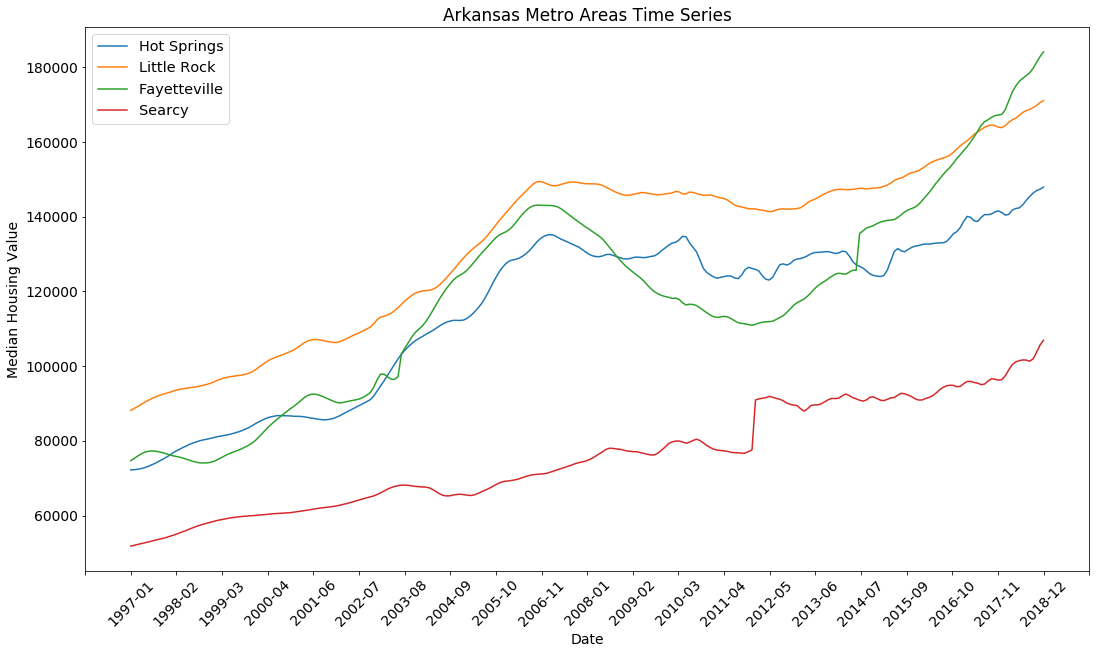

In [239]:
# timeseries plot
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.plot(Hot_Springs[date_columns].mean(), linestyle='solid')
ax.plot(Little_Rock[date_columns].mean(), linestyle='solid')
ax.plot(Fayetteville[date_columns].mean(), linestyle='solid')
ax.plot(Searcy[date_columns].mean(), linestyle='solid')

# decrease ticks
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax, 23), 1))

#set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Median Housing Value')
ax.set_title('Arkansas Metro Areas Time Series')

#increase font size
plt.rcParams.update({'font.size': 14.5})

# rotate ticks + show legend
plt.xticks(rotation=45)
plt.gca().legend(('Hot Springs', 'Little Rock', 'Fayetteville', 'Searcy'))

# show overall plot
plt.show()

In [254]:
#make a new dataframe for plotting the median housing values by state in December
geo_housing = df_housing[['State', 'MedianHousingValue']] #filter to just state and median housing value
geo_housing = geo_housing[geo_housing.index.month.isin([12])] #filter to just december
geo_housing = geo_housing.groupby(['State']).mean() #groupby State
geo_housing = round(geo_housing['MedianHousingValue'],0) #round to 0 decimal places
geo_housing = pd.Series.to_frame(geo_housing).reset_index() #convert back to dataframe
geo_housing.head()

,State,MedianHousingValue
0,AK,251838.0
1,AL,112026.0
2,AR,99936.0
3,AZ,201366.0
4,CA,476010.0


In [264]:
#build a geographic model of median housing values by state using plotly
data = dict (
    type = 'choropleth',
    locations = geo_housing['State'],
    locationmode='USA-states',
    colorscale = 'Viridis',
    z=geo_housing['MedianHousingValue'])

layout = dict(
        title = 'USA States Median Housing Values for December (1997-2018)<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

map = go.Figure(data=[data], layout = layout)
py.plotly.iplot(map)

## Model

In [275]:
#Check to make sure there are no missing values in ZipCode
print(np.sum(df_housing['ZipCode'].isna()))
print(len(df_housing[df_housing['ZipCode'] ==  0]))

0
0


In [276]:
df_housing.head()

,State,Metro,City,ZipCode,MedianHousingValue,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
Date,,,,,,,,,
1997-01-01,IL,Chicago-Naperville-Elgin,Chicago,60657,344400,4582424.0,4345274.0,237150.0,5.2
1997-01-01,TX,Houston-The Woodlands-Sugar Land,Katy,77494,197300,2291334.0,2160868.0,130466.0,5.7
1997-01-01,IL,Chicago-Naperville-Elgin,Chicago,60614,503400,4582424.0,4345274.0,237150.0,5.2
1997-01-01,TX,El Paso,El Paso,79936,77800,293639.0,259645.0,33994.0,11.6
1997-01-01,TX,Houston-The Woodlands-Sugar Land,Katy,77449,96600,2291334.0,2160868.0,130466.0,5.7


In [283]:
#make training and test sets
df_housing_train = df_housing.loc['1997-01-01':'2017-12-01'] #1997 to 2017 is training data
df_housing_test = df_housing.loc['1997-01-01':'2017-12-01'] #2018 is testing data

In [ ]:
#fit the prophet model
m = Prophet()